# Does a Player's Zodiac Sign Predict Their Overall Rating as a Professional Soccer Player?

## Import Libraries

In [267]:
import math
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn.linear_model import SGDRegressor

conn = sqlite3.connect('database.sqlite')
cursor = conn.cursor()

## Exploring the Data

In [290]:
df = pd.read_sql_query("SELECT player_api_id, overall_rating FROM Player_Attributes", conn)
df1 = pd.read_sql_query("SELECT player_api_id, birthday FROM Player", conn)

player_df = (pd.merge(df, df1, on='player_api_id'))

player_df.head()

,player_api_id,overall_rating,birthday
0,505942,67.0,1992-02-29 00:00:00
1,505942,67.0,1992-02-29 00:00:00
2,505942,62.0,1992-02-29 00:00:00
3,505942,61.0,1992-02-29 00:00:00
4,505942,61.0,1992-02-29 00:00:00


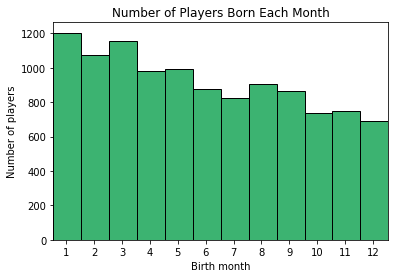

In [291]:
df_hist = pd.read_sql_query("SELECT player_name, birthday FROM Player", conn)

df_hist['month'] = df_hist.birthday.str[5:7].apply(int)

his = plt.hist(df_hist['month'], bins=12, color = 'MediumSeaGreen', edgecolor = "black")
offset = .5
plt.xticks(his[1][1:] - offset, ['1', '2', '3', '4','5','6','7','8','9','10','11','12'])
plt.xlim([1,12])
plt.xlabel('Birth month')
plt.ylabel('Number of players')
plt.title('Number of Players Born Each Month')
plt.show()

Looks like the most players are born in Jan, Feb, and March

## Cleaning and Parsing the Data

In [292]:
list_id,list_rating, list_birthday = player_df.values.transpose()

##### Find each all of the ratings for each player id

In [271]:
player_multiple_ratings = {}
for id, rating in zip(list_id, list_rating):
    player_multiple_ratings.setdefault(id, []).append(rating)

##### Find the average rating for each player id

In [272]:
average_rating = {}
for key in player_multiple_ratings:
    #print (key, sum(d[key])/len(d[key]))
    average_rating[key] = sum(player_multiple_ratings[key])/len(player_multiple_ratings[key]) #find the average

In [273]:
zodiac_df = player_df
zodiac_df['average_rating'] = player_df['player_api_id'].map(average_rating)

In [274]:
zodiac_df.head()

,player_api_id,overall_rating,birthday,average_rating
0,505942,67.0,1992-02-29 00:00:00,63.6
1,505942,67.0,1992-02-29 00:00:00,63.6
2,505942,62.0,1992-02-29 00:00:00,63.6
3,505942,61.0,1992-02-29 00:00:00,63.6
4,505942,61.0,1992-02-29 00:00:00,63.6


***Find the zodiac for each player id***

In [275]:
def get_zodiac_of_date(date):
    zodiacs = [(120, 'Capricorn'), (218, 'Aquarius'), (320, 'Pisces'), (420, 'Aries'), (521, 'Taurus'),
           (621, 'Gemini'), (722, 'Cancer'), (823, 'Leo'), (923, 'Virgo'), (1023, 'Libra'),
           (1122, 'Scorpio'), (1222, 'Sagittarius'), (1231, 'Capricorn')] 
    
    #1/20, 2/18, 3/20, 4/20, 5/21, 6/21, 7/22, 8/23, 9/23, 10/23, 11/22, 12/22, 12/31
    date_number = int("".join((str(date.month), '%02d' % date.day)))
    for z in zodiacs:
        if date_number <= z[0]:
            return z[1]
        
def get_zodiac_for_players(x):
    date  =  x.split(" ")[0]
    date = datetime.datetime.strptime(date, "%Y-%m-%d").date()
    return get_zodiac_of_date(date)

In [276]:
zodiac_df["zodiac"] = np.vectorize(get_zodiac_for_players)(player_df["birthday"])

In [277]:
zodiac_df.head()

,player_api_id,overall_rating,birthday,average_rating,zodiac
0,505942,67.0,1992-02-29 00:00:00,63.6,Pisces
1,505942,67.0,1992-02-29 00:00:00,63.6,Pisces
2,505942,62.0,1992-02-29 00:00:00,63.6,Pisces
3,505942,61.0,1992-02-29 00:00:00,63.6,Pisces
4,505942,61.0,1992-02-29 00:00:00,63.6,Pisces


In [278]:
zodiac_df = zodiac_df.drop_duplicates(['player_api_id'], keep = "first")
zodiac_df.head()

,player_api_id,overall_rating,birthday,average_rating,zodiac
0,505942,67.0,1992-02-29 00:00:00,63.600000,Pisces
5,155782,74.0,1989-12-15 00:00:00,66.969697,Sagittarius
38,162549,65.0,1991-05-13 00:00:00,67.000000,Taurus
64,30572,69.0,1982-05-08 00:00:00,69.086957,Taurus
87,23780,70.0,1979-11-08 00:00:00,73.240000,Scorpio


***Create column that references zodiac column and assigns correlated int***

In [279]:
def get_zodiac_number(x):
    if x == 'Capricorn':
        return 1
    if x == 'Aquarius':
        return 2
    if x == 'Pisces':
        return 3
    if x == 'Aries':
        return 4
    if x == 'Taurus':
        return 5
    if x == 'Gemini':
        return 6
    if x == 'Cancer':
        return 7
    if x == 'Leo':
        return 8
    if x == 'Virgo':
        return 9
    if x == 'Libra':
        return 10
    if x == 'Scorpio':
        return 11
    if x == 'Sagittarius':
        return 12

In [280]:
pd.options.mode.chained_assignment = None  

In [281]:
zodiac_df['zodiac_number'] = zodiac_df['zodiac'].apply(lambda x: get_zodiac_number(x))

In [282]:
zodiac_df.head()

,player_api_id,overall_rating,birthday,average_rating,zodiac,zodiac_number
0,505942,67.0,1992-02-29 00:00:00,63.600000,Pisces,3
5,155782,74.0,1989-12-15 00:00:00,66.969697,Sagittarius,12
38,162549,65.0,1991-05-13 00:00:00,67.000000,Taurus,5
64,30572,69.0,1982-05-08 00:00:00,69.086957,Taurus,5
87,23780,70.0,1979-11-08 00:00:00,73.240000,Scorpio,11


## Implementing Stochastic Gradient Descent Regressor

In [316]:
zodiac_df.shape

(10304, 6)

![machinelearningmap](machine_learning_map.png)

In [283]:
zodiac_df = zodiac_df.dropna()
zodiac_df["average_rating"]= zodiac_df["average_rating"].astype(int)

fitter = SGDRegressor(loss="squared_loss", penalty=None)

In [323]:
X = zodiac_df.as_matrix(columns=["zodiac_number"]) #a true matrix for SDGRegressor
y = zodiac_df["average_rating"].tolist() #player_rating is what we want to predict

/Users/avrasaslow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [324]:
fitter.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Text(0, 0.5, 'Player Rating')

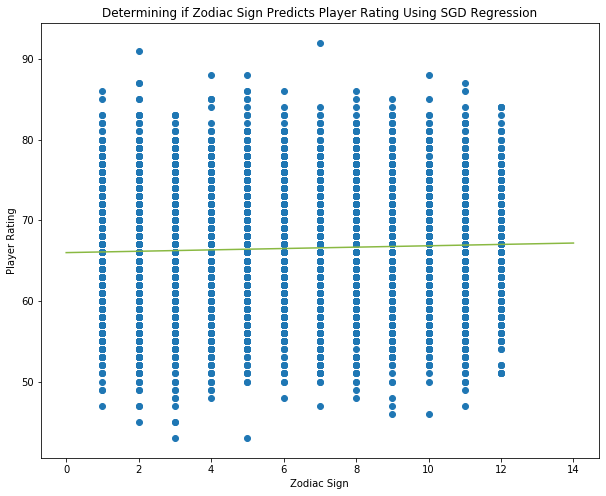

In [328]:
xs = list(range(0, 15, 1))
xs = np.array(xs).reshape(-1, 1)

new_ys = fitter.predict(xs)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(zodiac_df["zodiac_number"], zodiac_df["average_rating"])
ax.plot(xs, new_ys, color="#8ab942") #green cause soccer fields are green

ax.title.set_text('Determining if Zodiac Sign Predicts Player Rating Using SGD Regression')
ax.set_xlabel('Zodiac Sign') 
ax.set_ylabel('Player Rating')

In [329]:
r2 = fitter.score(X, y, sample_weight=None)
print("R-squared value is", r2)

R-squared value is -0.0009416644002810948
